<a href="https://colab.research.google.com/github/ritik1804k/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

<b> Some intresting things about hotels </b>

Whenever we go to a place for holidaying or for some work we tends to  look forward to some intresting hotels as well as restraunts. These are some basis info. we always look before travelling.

**"Nothing makes you feel better than when you get into a hotel bed, and the sheets feel so good. Why shouldn't you wake up like that every day? Spend money on your mattress and bedding because these things make a difference on your sleep and, ultimately, your happiness."**
These are some wonderfull lines by *Bobby Berk*. He is an Emmy winning television host, author and interior designer. He stars in the Netflix series Queer Eye as the interior design expert.
(Source :https://bobbyberk.com/)

There will be a thorough analysis on the booking of hotels:
* Getting into the head of the problem according to its requirement
* Picking up the key variable to relate the most information out of it
* Exploring the dataset and handle the missing data, outliers and categorical variables. 
 
 * let's the party get started 



In [ ]:
# giving some members there nicknames
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# uploading the csv file to the party 
path  = '/content/drive/MyDrive/Colab Notebooks/Capstone project csv files/ Hotel Bookings.csv'
hotel_df = pd.read_csv(path)

In [ ]:
#  top ten rows of dataframe
hotel_df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [ ]:
#  bottom ten rows of dataframe
hotel_df.tail(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119380,City Hotel,0,44,2017,August,35,31,1,3,2,...,No Deposit,9.0,NaN,0,Transient,140.75,0,1,Check-Out,2017-09-04
119381,City Hotel,0,188,2017,August,35,31,2,3,2,...,No Deposit,14.0,NaN,0,Transient,99.00,0,0,Check-Out,2017-09-05
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,2017-09-05
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,2017-09-06
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,2017-09-06
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
#check the decoration
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# we also want he size of our party(i.e, Dataset size) 
hotel_df.shape

(119390, 32)

In [ ]:
 # we should now clean and manipulate the for the upcoming guest
 #looking for some null values
hotel_df.isna().sum().sort_values(ascending = False)[0:5]

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
dtype: int64

In [ ]:
# as we can see that there are four columns with null value ( company,agent,country,children)
# relpacing all the null values with some suitable value
hotel_df['company'].fillna(0,inplace=True)
hotel_df['agent'].fillna(0,inplace=True)
hotel_df['country'].fillna('other',inplace=True)
hotel_df['children'].fillna(0,inplace=True)

In [ ]:
# done with missing values in our party
hotel_df.isna().sum().sort_values(ascending = False)[0:10]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
customer_type                  0
days_in_waiting_list           0
company                        0
agent                          0
dtype: int64

In [ ]:
#checking for duplicate rows
duplicate_rows =  hotel_df.duplicated().value_counts()
print(f'All the True value are for duplicate rows: {duplicate_rows}')

All the True value are for duplicate rows: False    87396
True     31994
dtype: int64


In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# we should create some new columns
hotel_df['total people'] = hotel_df['adults'] + hotel_df['children'] + hotel_df['babies']
hotel_df['total stay'] = hotel_df['stays_in_weekend_nights'] + hotel_df['stays_in_week_nights']

In [ ]:
# new columns added
hotel_df[['total people','total stay']]

,total people,total stay
0,2.0,0
1,2.0,0
2,1.0,1
3,1.0,1
4,2.0,2
...,...,...
119385,2.0,7
119386,3.0,7
119387,2.0,7
119388,2.0,7


 let's add some fun to the party by some stats
 # Have you ever wondered when the best time of year to book a hotel room is? 

In [ ]:
# counting the no. of bookings in different months in a year
best_time_in_year =  hotel_df['arrival_date_month'].value_counts().sort_index()
best_time_in_year

April        11089
August       13877
December      6780
February      8068
January       5929
July         12661
June         10939
March         9794
May          11791
November      6794
October      11160
September    10508
Name: arrival_date_month, dtype: int64

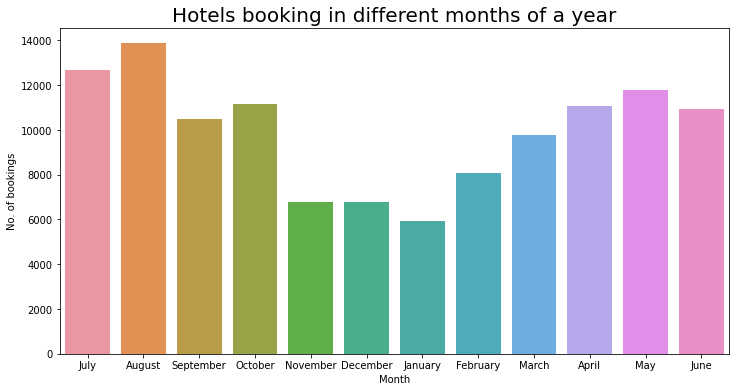

In [ ]:
# ploting bar graph to show the best time for hotel booking 
plt.rcParams['figure.figsize'] = (12,6)
month = sns.countplot(x = hotel_df['arrival_date_month'], data = hotel_df)
month.set_title('Hotels booking in different months of a year', fontsize = 20)
month.set_xlabel('Month', fontsize = 10)
month.set_ylabel('No. of bookings', fontsize = 10)
plt.show()

From the above data we have seen that in the month of August the no. of booking are maximun and in the month of January booking rate is decreased. This properly indicates that August and July have the highest number of bookings compared to any other month. This could also be because of school vacations during August and July. We would recommend you that bookings in the month of jan,feb,nov,dec could be much more benificial and have high chances of getting desired hotels and room. 

# What if we look towards the prefrence of meals from the guest ?

In [ ]:
#average type of meal any family used to have
avg_meal= hotel_df.groupby(['meal'])['total people'].mean()
avg_meal

meal
BB           1.964078
FB           2.086466
HB           2.066307
SC           1.871268
Undefined    1.886228
Name: total people, dtype: float64

Meals and its discription:-

 * Undefined – no meal package

 * BB – Bed & Breakfast

 * HB – Half board (breakfast and one other meal – usually dinner)

 * FB – Full board (breakfast, lunch and dinner)

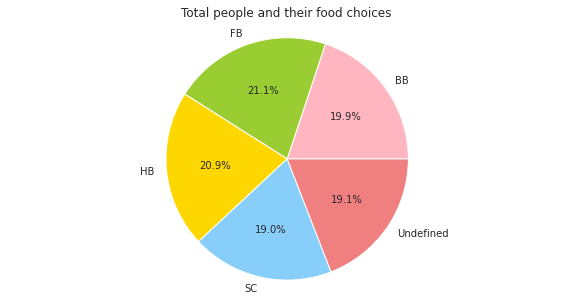

In [ ]:
_# Creating pie chart for average family meal
label = ['BB','FB','HB','SC','Undefined']
plt.pie(avg_meal,labels=label,colors=['lightpink','yellowgreen', 'gold', 'lightskyblue', 'lightcoral'],autopct='%1.1f%%')
plt.axis('equal')
plt.title('Total people and their food choices')
plt.show()

It has been a quite sharing with the variety of food ordered by the family as we can see FB(full board) and HB(half boad) has the highest percent among all in the above pie chart there has been somewhat satisfied distribution with the meal range.


# City hotel or Resort which option is prefered by the guests? 

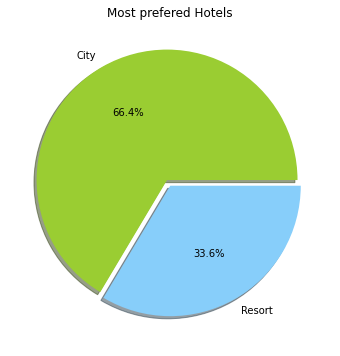

In [ ]:
# pie chart showing the most prefered hotel 
most_prefered_hotel = hotel_df[['hotel']].value_counts()
label1 = ['City','Resort']
explode=(0.05,0)
plt.pie(most_prefered_hotel,labels=label1,colors=['yellowgreen','lightskyblue'],autopct='%1.1f%%',shadow=True,explode=explode)
plt.title('Most prefered Hotels')
plt.show()

Clearly we can see City hotel is booked in high numbers compared to Resorts. 

#  Which country spends the most amount of money when they are visiting?

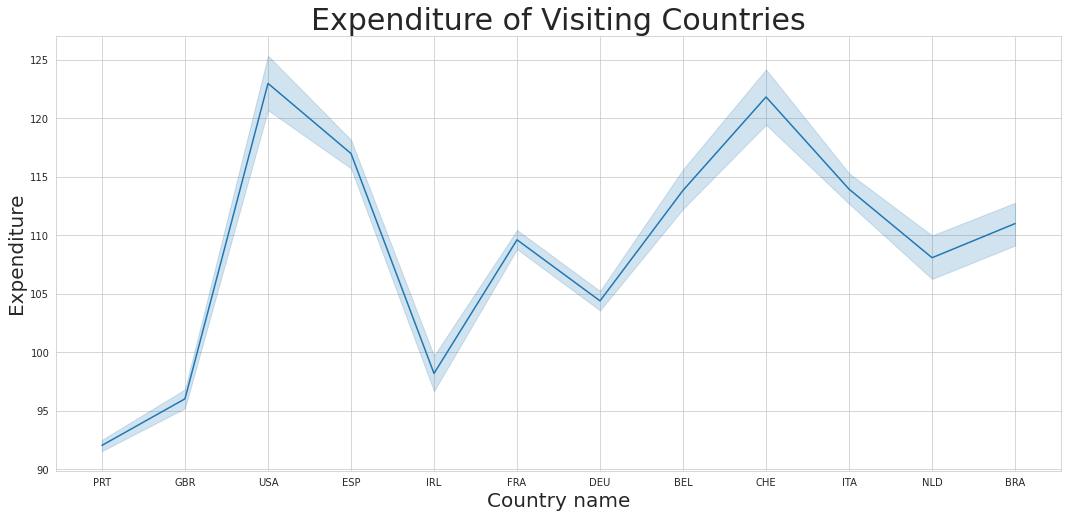

In [ ]:
#in this we can see that which country spends the most amount of money when they are visiting

countries =  ('PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'NLD','USA','CHE')
#counting the appearence of these top country
countries_df = hotel_df.loc[hotel_df['country'].isin(countries)]['country']

plt.rcParams['figure.figsize'] = (18, 8)
sns.set_style('whitegrid')
ax = sns.lineplot(x = countries_df, y = hotel_df['adr'])
ax.set_title('Expenditure of Visiting Countries', fontsize = 30)
ax.set_xlabel('Country name', fontsize = 20)
ax.set_ylabel('Expenditure', fontsize = 20)
plt.show()

In [ ]:
# in which month hotel get canceled the most
canceled = hotel_df[(hotel_df['is_canceled']==1) & (hotel_df['arrival_date_month'])]['arrival_date_month'].value_counts()
canceled

August       5239
July         4742
May          4677
June         4535
April        4524
October      4246
September    4116
March        3149
February     2696
December     2371
November     2122
January      1807
Name: arrival_date_month, dtype: int64

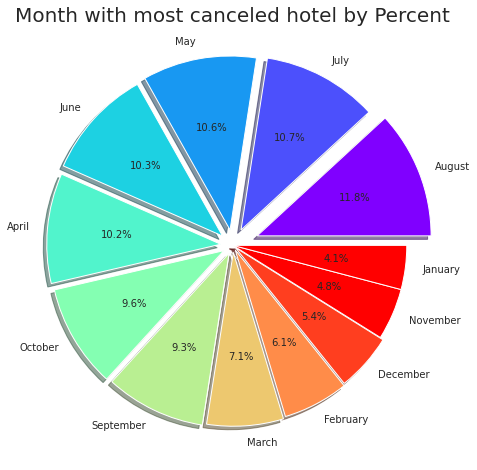

In [ ]:
# ploting a graph for canceled hotels in different months

labels_2 = canceled.index
sizes = canceled.values
color = plt.cm.rainbow(np.linspace(0,5))
explode = (0.15,0.1,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0,0)
plt.pie(sizes,labels=labels_2,colors=color,explode=explode,autopct='%1.1f%%',shadow =True)
plt.title("Month with most canceled hotel by Percent", fontsize =20)
plt.show()

Text(0.5, 1.0, 'Country wise spending nights')

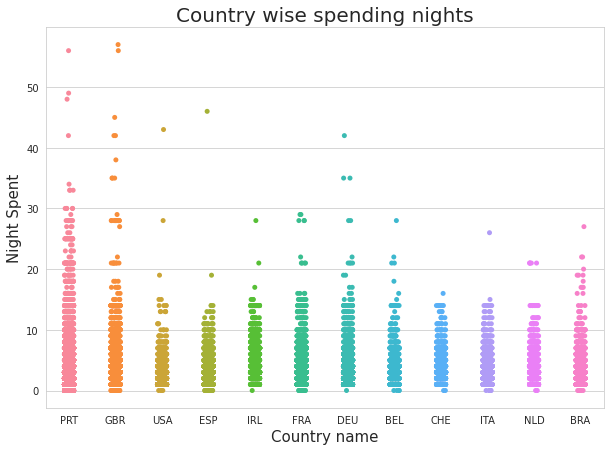

In [ ]:
#combining the stays in weekends and stays in week days to get the total number nights spent
stay = hotel_df['stays_in_weekend_nights'] + hotel_df['stays_in_week_nights']
countries = hotel_df.loc[hotel_df['country'].isin(countries)]['country']

plt.rcParams['figure.figsize'] = (10, 7)
sns.stripplot(countries, stay)
plt.xlabel('Country name', fontsize =15)
plt.ylabel('Night Spent',fontsize =15)
plt.title('Country wise spending nights', fontsize = 20)

# What if you wanted to know about how many hotels are likely to receive a disproportionately high number of special requests?

In [ ]:
# list of hotels with no of special request you can make
x1 = hotel_df['total_of_special_requests'].value_counts()
x1

0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64

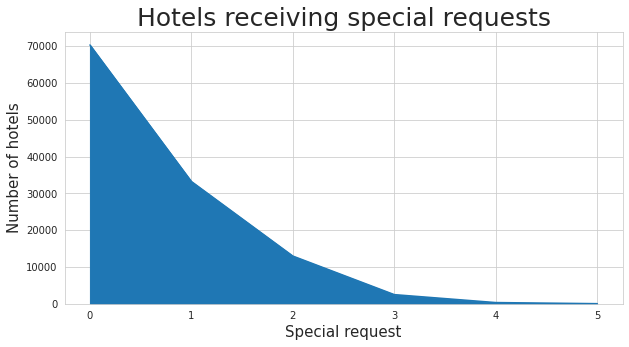

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
x1.plot.area();
plt.title('Hotels receiving special requests' , fontsize = 25)
plt.xlabel('Special request', fontsize =15)
plt.ylabel('Number of hotels',fontsize =15)
plt.show()


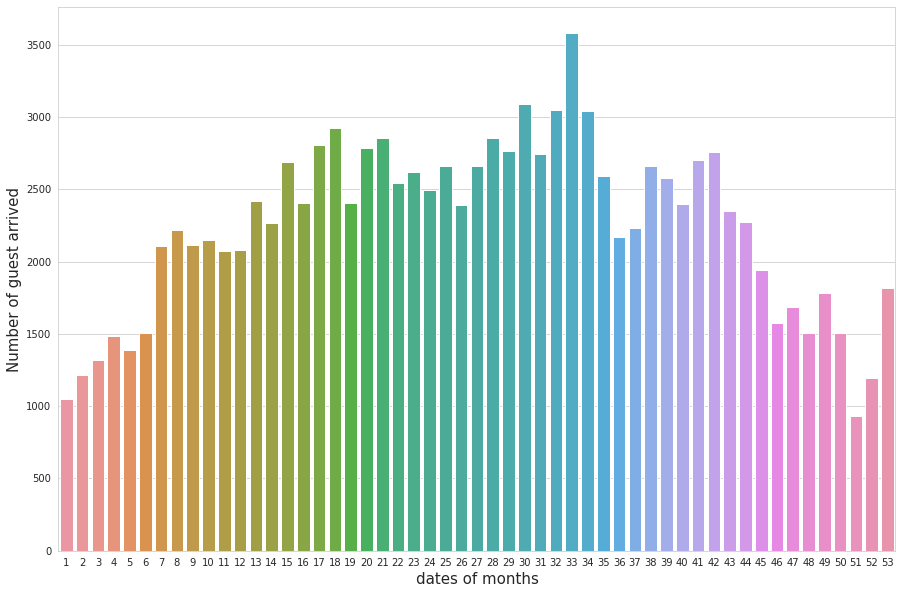

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='arrival_date_week_number',data=hotel_df)
plt.xlabel('dates of months', fontsize =15)
plt.ylabel('Number of guest arrived',fontsize =15)
# plt.xticks(rotation='horizontal')
plt.show()

We see that week number 33 has the highest number of bookings compared to any other week. This week lies around the time of august which further supports the idea that we have festivities and vacations during the month of August. Also we see that there are considerably less number of bookings towards the end of the year, especially during week 51 which usually falls in December during the time of Christmas

# The optimal length of stay in order to get the best daily rate?

(array([1.05478e+05, 1.25570e+04, 1.12200e+03, 1.47000e+02, 6.60000e+01,
        6.00000e+00, 8.00000e+00, 1.00000e+00, 4.00000e+00, 1.00000e+00]),
 array([ 0. ,  6.9, 13.8, 20.7, 27.6, 34.5, 41.4, 48.3, 55.2, 62.1, 69. ]),
 <a list of 10 Patch objects>)

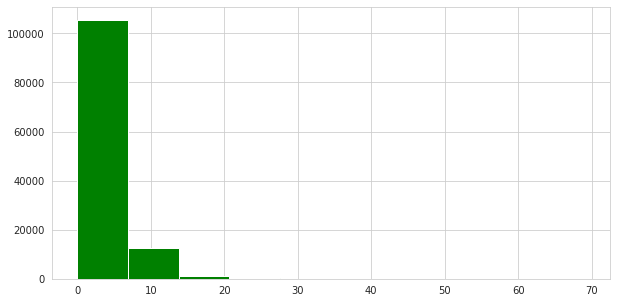

In [ ]:
optimal_length_of_stay = hotel_df['total stay']
plt.hist(optimal_length_of_stay, color='green')
# plt.xlabel('Age')
# plt.ylabel('Frequency')

In [ ]:
# Corelation matrix
hotel_df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total people,total stay
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005036,-0.032491,...,-0.057358,-0.144381,-0.046529,-0.082995,0.054186,0.047557,-0.195498,-0.234658,0.046522,0.017779
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037613,-0.020915,...,-0.073548,0.000149,-0.012640,-0.086250,0.170084,-0.063077,-0.116451,-0.095712,0.072265,0.157167
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054636,-0.013192,...,0.029218,0.030872,0.056463,0.033882,-0.056497,0.197580,-0.013684,0.108531,0.052127,0.031438
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005515,0.010395,...,-0.020904,0.005508,-0.018244,-0.032750,0.022933,0.075791,0.001920,0.026149,0.025220,0.018719
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014553,-0.000230,...,-0.000300,0.010613,0.000202,0.003724,0.022728,0.030245,0.008683,0.003062,0.006742,-0.027408
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045794,0.018483,...,-0.042715,0.063281,0.161427,-0.079977,-0.054151,0.049342,-0.018554,0.072671,0.101426,0.762790
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,...,-0.048743,0.096209,0.195135,-0.043641,-0.002020,0.065237,-0.024859,0.068192,0.101665,0.941005
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030440,0.018146,...,-0.107983,-0.051673,0.024994,-0.166778,-0.008283,0.230641,0.014785,0.122884,0.821105,0.105249
children,0.005036,-0.037613,0.054636,0.005515,0.014553,0.045794,0.044203,0.030440,1.000000,0.024030,...,-0.021072,0.048952,0.050581,-0.042622,-0.033271,0.324853,0.056255,0.081736,0.579364,0.050865
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,...,-0.006550,0.083440,0.030266,-0.009459,-0.010621,0.029186,0.037383,0.097889,0.162688,0.022283


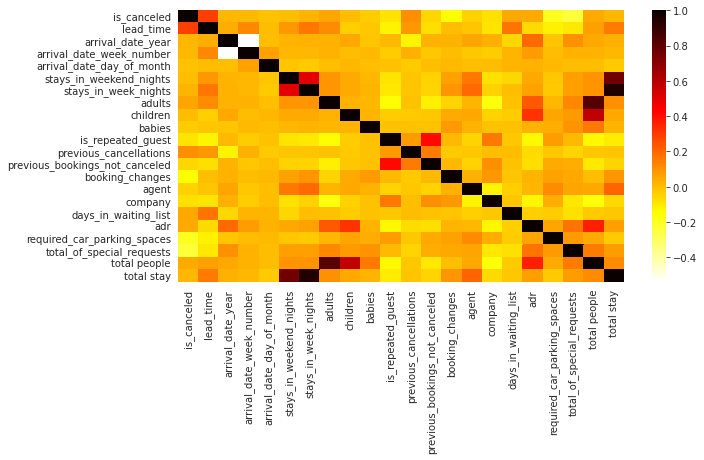

In [ ]:
# heatmap for the corelation matrix
plt.rcParams['figure.figsize'] = (10, 5)
sns.heatmap(hotel_df.corr(),cmap='hot_r')
plt.show()